# Accessing Databases via Web APIs
* * * * *

In [1]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

## The New York Times API: All the Data Thats Fit to Query

### 1. Establishing the Connection

Put the API Key you just created in the `api_key` variable in the cell below

In [1]:
#put your key here
api_key = ""

In [2]:
#Save your api locally as a text file

with open("nyt_api_key.txt", "w") as f:
    f.write(api_key)

To access the NYTimes' databases we'll be using a third-party library called [pynytimes](https://github.com/michadenheijer/pynytimes). This package provides an easy to use tool for accessing the wealth of data hosted by the Times.

To install the library, follow these instructions taken from their github repo.

## Installation

There are multiple options to install and ugprade pynytimes, but the easiest is by just installing it using ```pip``` (or ```pip3```).
### Linux and Mac

```bash
pip install --upgrade pynytimes
```

### Windows

```shell
python -m pip install --upgrade pynytimes
```

### Development

You can also install ```pynytimes``` manually from GitHub itself. This can be done by cloning this repository first, and then installing it using Python. *This might install an unreleased version, installation using this method is only advised if you want to modify the code or help maintain this library.*

```bash
git clone https://github.com/michadenheijer/pynytimes.git
cd pynytimes
python setup.py install
```

### Older Python versions

The current version of ```pynytimes``` only supports the most recent Python versions (3.8, 3.9, and 3.10) however you still might be running older versions of Python. Luckily most of ```pynytimes``` features are still available. In the table below you can see which version of ```pynytimes``` still supports your Python version.

| Python version | ```pynytimes``` version | Missing features                             |
|----------------|-------------------------|----------------------------------------------|
| 3.7            | ```0.7.0```             | Some type hints, small bugfixes              |
| 3.6            | ```0.6.1```             | Type hints, small bugfixes, ```with``` usage |
| 3.5            | ```0.4.2```             | Times Tags, no date parsing                  |

You can install an older version by ```pip install --upgrade pynytimes==0.7.0```.

In [3]:
!pip install pynytimes

Once the package installed, let's go ahead import the library and initialize a connection to their servers using our api keys.

In [37]:
#Import the NYTAPI object which we'll use to access the API
from pynytimes import NYTAPI

In [38]:
#intialize nyt api class using your api key
nyt = NYTAPI(api_key, parse_dates=True)

Ta-da! We are now ready to make some API calls!!

### 2. Making API Calls
*****

Here's comes the fun part. Now that we've established a connection to New York Times' rich database, let's go over what kind of data and privileges we have access to.

### APIs

[Here is the collection of the APIs the NYT gives us.](https://developer.nytimes.com/apis)

- [Top stories](https://developer.nytimes.com/docs/top-stories-product/1/overview): Returns an array of articles currently on the specified section 
- [Most viewed/shared articles](https://developer.nytimes.com/docs/most-popular-product/1/overview): Provides services for getting the most popular articles on NYTimes.com based on emails, shares, or views.
- [Article search](https://developer.nytimes.com/docs/articlesearch-product/1/overview): Look up articles by keyword. You can refine your search using filters and facets.
- [Books](https://developer.nytimes.com/docs/books-product/1/overview): Provides information about book reviews and The New York Times Best Sellers lists.
- [Movie reviews](https://developer.nytimes.com/docs/movie-reviews-api/1/overview): Search movie reviews by keyword and opening date and filter by Critics' Picks.
- [Times Wire](https://developer.nytimes.com/docs/timeswire-product/1/overview): Get links and metadata for Times' articles as soon as they are published on NYTimes.com. The Times Newswire API provides an up-to-the-minute stream of published articles.
- [Tag query (TimesTags)](https://developer.nytimes.com/docs/timestags-product/1/overview): Provide a string of characters and the service returns a ranked list of suggested terms.
- [Archive metadata](https://developer.nytimes.com/docs/archive-product/1/overview): Returns an array of NYT articles for a given month, going back to 1851.

In this workshop we go over a few of the APIs and do some light data analysis of the data we pull.

**Top Stories**

Let's see what are the top stories of the day. To do that all we have to do is call a single method on the `nyt` object

In [40]:
# Get all the top stories from the home page
top_stories = nyt.top_stories()

print(f"top_stories is a list of length {len(top_stories)}")

top_stories is a list of length 59


The `top_stories` method has a single paramater called `section` parameter defaults to "home".

In [41]:
#Preview the output
top_stories[:3]

[{'section': 'us',
  'subsection': 'politics',
  'title': 'The Next Big Lies: Jan. 6 Was No Big Deal, or a Left-Wing Plot',
  'abstract': 'How revisionist histories of Jan. 6 picked up where the “stop the steal” campaign left off, warping beliefs about what transpired at the Capitol.',
  'url': 'https://www.nytimes.com/2022/01/06/us/politics/jan-6-lies.html',
  'uri': 'nyt://article/fd0133bf-981d-57c7-9ea9-ed8246dea671',
  'byline': 'By Matthew Rosenberg, Jim Rutenberg and Michael M. Grynbaum',
  'item_type': 'Article',
  'updated_date': datetime.datetime(2022, 1, 6, 14, 15, 24, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
  'created_date': datetime.datetime(2022, 1, 6, 12, 56, 11, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
  'published_date': datetime.datetime(2022, 1, 6, 12, 56, 11, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
  'material_type_facet': '',
  'kicker': '',
  'des_facet': ['Storming of the U

This is pretty typical output for data pulled from an API. We are looking at a list of nested JSON dictionaries.

When working with a new api, a good way to establish an understanding of the data is to inspect a single object in the collection. Let's grab the first story in the array and inspect it's attributes and data.

In [7]:
top_story = top_stories[0]
top_story

{'section': 'us',
 'subsection': 'politics',
 'title': 'For C.D.C.’s Walensky, a Steep Learning Curve on Messaging',
 'abstract': 'Dr. Rochelle Walensky, the director of the Centers for Disease Control and Prevention, has stumbled in explaining her policy decisions.',
 'url': 'https://www.nytimes.com/2022/01/05/us/politics/cdc-rochelle-walensky-covid-isolation-testing.html',
 'uri': 'nyt://article/68c90eb8-f79e-5b62-8174-5aae8a4a256b',
 'byline': 'By Sharon LaFraniere, Sheryl Gay Stolberg and Noah Weiland',
 'item_type': 'Article',
 'updated_date': datetime.datetime(2022, 1, 5, 21, 34, 5, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 'created_date': datetime.datetime(2022, 1, 5, 18, 58, 47, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 'published_date': datetime.datetime(2022, 1, 5, 18, 58, 47, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400))),
 'material_type_facet': '',
 'kicker': '',
 'des_facet': ['Coronavirus 

We are provided a diverse collection of data for the article ranging from the expected (title, author, section) and to NLP-derived information such as named entities. And FYI does not provide the full article in their API.

**Does anything about the data stand out to you? What bits of information could be useful to you and your research needs?**

If we are interested in a specific section then we can pass in one of the following tags into the `section` parameter:


```arts```, ```automobiles```, ```books```, ```business```, ```fashion```, ```food```, ```health```, ```home```, ```insider```, ```magazine```, ```movies```, ```national```, ```nyregion```, ```obituaries```, ```opinion```, ```politics```, ```realestate```, ```science```, ```sports```, ```sundayreview```, ```technology```, ```theater```, ```tmagazine```, ```travel```, ```upshot```, and ```world```.


#### Challenge 1: Find the top stories for a section

- Choose 2 sections, grab their top stories and collect them into lists.
- Tell us how many stories are each in section and what is the title of the first story in each list.

In [8]:
# sports
section = "sports"
top_sports_stories = nyt.top_stories(section=section)
print("There are {} {} stories".format(len(top_sports_stories), section))

There are 38 sports stories


In [9]:
#grab first story
top_sport_story = top_sports_stories[0]
top_sport_story_title = top_sport_story["title"]
top_sport_story_title

'Novak Djokovic Is Refused Entry Into Australia Over Vaccine Exemption'

In [10]:
# technology
section = "technology"
top_tech_stories = nyt.top_stories(section=section)
print("There are {} {} stories".format(len(top_tech_stories), section))

There are 29 technology stories


In [11]:
#grab first story
top_tech_story = top_tech_stories[0]
top_tech_story_title = top_tech_story["title"]
top_tech_story_title

'Right-Wing Calls to Celebrate Jan. 6 Anniversary Draw a Muted Response'

#### Organizing the API results into a Pandas DataFrame

In order to conduct any sort of analysis we need to convert the list of JSON data to a Pandas dataframe. Pandas allows use to simply pass in the array of article data and produce a nice clean table in one line of code. 

First let's see what happens when we pass in `top_stories` to `pd.json_normalize`

In [43]:
#Convert to DataFrmae
df = pd.json_normalize(top_stories)
#View first 5 rows
df.head()

,section,subsection,title,abstract,url,uri,byline,item_type,updated_date,created_date,published_date,material_type_facet,kicker,des_facet,org_facet,per_facet,geo_facet,multimedia,short_url
0,us,politics,"The Next Big Lies: Jan. 6 Was No Big Deal, or ...",How revisionist histories of Jan. 6 picked up ...,https://www.nytimes.com/2022/01/06/us/politics...,nyt://article/fd0133bf-981d-57c7-9ea9-ed8246de...,"By Matthew Rosenberg, Jim Rutenberg and Michae...",Article,2022-01-06 14:15:24-05:00,2022-01-06 12:56:11-05:00,2022-01-06 12:56:11-05:00,,,"[Storming of the US Capitol (Jan, 2021), Rumor...",[],"[Trump, Donald J]",[],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3n2z8AP
1,us,politics,"A Year Later, Jan. 6 Becomes Just Another Wedg...",The nearly universal outrage after the assault...,https://www.nytimes.com/2022/01/06/us/politics...,nyt://article/004bfebf-4f55-54ee-9804-f73413ac...,By Peter Baker,Article,2022-01-06 06:10:42-05:00,2022-01-06 03:00:15-05:00,2022-01-06 03:00:15-05:00,,news analysis,"[Storming of the US Capitol (Jan, 2021), Unite...",[Republican Party],"[Trump, Donald J]",[],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3ETiFFe
2,us,politics,"Top Republicans, who have downplayed and denie...",,https://www.nytimes.com/live/2022/01/06/us/jan...,nyt://article/e9627d47-50b2-5399-bd42-b2d232a9...,By Catie Edmondson,Article,2022-01-06 11:00:16-05:00,2022-01-06 11:00:16-05:00,2022-01-06 11:00:16-05:00,,,[],[],[],[],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3G65It2
3,business,,Lifesaving Covid Treatments Face Rationing as ...,Scarce supplies and surging Covid cases have c...,https://www.nytimes.com/2022/01/06/business/co...,nyt://article/799c7f3a-c482-5ae1-afc8-a24d25bc...,"By Rebecca Robbins, Noah Weiland and Christina...",Article,2022-01-06 13:48:44-05:00,2022-01-06 11:13:30-05:00,2022-01-06 11:13:30-05:00,,,"[Coronavirus Omicron Variant, Coronavirus (201...","[GlaxoSmithKline PLC, Pfizer Inc]",[],[],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/3pYEwXn
4,travel,,"Cases Rise, Criticism Mounts, but Ships Keep C...",One day after the C.D.C. advised against all t...,https://www.nytimes.com/2022/01/06/travel/coro...,nyt://article/48fda516-911d-5d08-a3a9-09b35930...,By Ceylan Yeginsu,Article,2022-01-06 13:01:39-05:00,2022-01-06 05:00:16-05:00,2022-01-06 05:00:16-05:00,,,"[Coronavirus Risks and Safety Concerns, Quaran...","[Carnival Cruise Lines, Celebrity Cruises Inc,...",[],[],[{'url': 'https://static01.nyt.com/images/2022...,https://nyti.ms/332GRYu


In [44]:
#Inspect metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   section              59 non-null     object
 1   subsection           59 non-null     object
 2   title                59 non-null     object
 3   abstract             59 non-null     object
 4   url                  59 non-null     object
 5   uri                  59 non-null     object
 6   byline               59 non-null     object
 7   item_type            59 non-null     object
 8   updated_date         59 non-null     object
 9   created_date         59 non-null     object
 10  published_date       59 non-null     object
 11  material_type_facet  59 non-null     object
 12  kicker               59 non-null     object
 13  des_facet            59 non-null     object
 14  org_facet            59 non-null     object
 15  per_facet            59 non-null     object
 16  geo_facet 

For the most part it does a good job of producing a table where
- The columns correspond with the JSON dictionary keys from our API call.
- The number of rows matches the number of articles.
- Each cell holds the corresponding value found under that article's dictionary key.

However there is one issue and that can be found in the multimedia column

In [45]:
#Grab the multimedia column data
multimedia = df["multimedia"]
multimedia.head()

0    [{'url': 'https://static01.nyt.com/images/2022...
1    [{'url': 'https://static01.nyt.com/images/2022...
2    [{'url': 'https://static01.nyt.com/images/2022...
3    [{'url': 'https://static01.nyt.com/images/2022...
4    [{'url': 'https://static01.nyt.com/images/2022...
Name: multimedia, dtype: object

In [46]:
#first row
multimedia.iloc[0]

[{'url': 'https://static01.nyt.com/images/2022/01/06/multimedia/06jan6-history-5/merlin_199969818_b4550558-cc27-45d7-8913-7cee3938105f-superJumbo.jpg',
  'format': 'superJumbo',
  'height': 1365,
  'width': 2048,
  'type': 'image',
  'subtype': 'photo',
  'caption': '',
  'copyright': 'Christopher Lee'}]

The data in the multimedia column is what's referred to as a nested list. An issue may arise if we'd like to treat attributes in an article's `multimedia` data as distinct columns. The `json_normalize` method has parameters that get around this.

In [47]:
#Call the json_normalize method by setting record_path to multimedia
#Set record_prefix to "multimedia_" to identify the data under multimedia
#Set meta to a list of columns from the original dataframe cols
cols = df.columns.tolist()
df = pd.json_normalize(top_stories, record_path = "multimedia", record_prefix= "multimedia_", meta=cols)
df.head()

,multimedia_url,multimedia_format,multimedia_height,multimedia_width,multimedia_type,multimedia_subtype,multimedia_caption,multimedia_copyright,section,subsection,...,created_date,published_date,material_type_facet,kicker,des_facet,org_facet,per_facet,geo_facet,multimedia,short_url
0,https://static01.nyt.com/images/2022/01/06/mul...,superJumbo,1365,2048,image,photo,,Christopher Lee,us,politics,...,2022-01-06 12:56:11-05:00,2022-01-06 12:56:11-05:00,,,"[Storming of the US Capitol (Jan, 2021), Rumor...",[],"[Trump, Donald J]",[],{'url': 'https://static01.nyt.com/images/2022/...,https://nyti.ms/3n2z8AP
1,https://static01.nyt.com/images/2022/01/06/us/...,superJumbo,1365,2048,image,photo,The first anniversary of the assault on the Ca...,Al Drago for The New York Times,us,politics,...,2022-01-06 03:00:15-05:00,2022-01-06 03:00:15-05:00,,news analysis,"[Storming of the US Capitol (Jan, 2021), Unite...",[Republican Party],"[Trump, Donald J]",[],{'url': 'https://static01.nyt.com/images/2022/...,https://nyti.ms/3ETiFFe
2,https://static01.nyt.com/images/2022/01/06/us/...,superJumbo,1365,2048,image,photo,Senator Mitch McConnell will skip the ceremoni...,Al Drago for The New York Times,us,politics,...,2022-01-06 11:00:16-05:00,2022-01-06 11:00:16-05:00,,,[],[],[],[],{'url': 'https://static01.nyt.com/images/2022/...,https://nyti.ms/3G65It2
3,https://static01.nyt.com/images/2022/01/05/bus...,superJumbo,1365,2048,image,photo,Louis Shantzek got Covid but was unable to rec...,Scott McIntyre for The New York Times,business,,...,2022-01-06 11:13:30-05:00,2022-01-06 11:13:30-05:00,,,"[Coronavirus Omicron Variant, Coronavirus (201...","[GlaxoSmithKline PLC, Pfizer Inc]",[],[],{'url': 'https://static01.nyt.com/images/2022/...,https://nyti.ms/3pYEwXn
4,https://static01.nyt.com/images/2022/01/06/tra...,superJumbo,1365,2048,image,photo,"The German cruise ship AIDAnova, docked in Lis...",Armando Franca/Associated Press,travel,,...,2022-01-06 05:00:16-05:00,2022-01-06 05:00:16-05:00,,,"[Coronavirus Risks and Safety Concerns, Quaran...","[Carnival Cruise Lines, Celebrity Cruises Inc,...",[],[],{'url': 'https://static01.nyt.com/images/2022/...,https://nyti.ms/332GRYu


All the information from multimedias has been restructed to be on the same level as the rest of the data.

In [48]:
#save data to csv file
df.to_csv("top_nyt_articles.csv")

#### Most viewed and shared articles

Retrieving the most viewed and shared articles is also quite simple. The `days` parameter returns the most popular articles based on the last N days, only allowed to pass in 1, 7, or 30.

In [49]:
#Retrieve the most viewed articles for today. Days defaults to 1
most_viewed_today = nyt.most_viewed()
most_viewed_today[0]

{'uri': 'nyt://article/3f5582aa-f227-5c65-a7a0-c7720a69d8ca',
 'url': 'https://www.nytimes.com/2022/01/05/sports/tennis/novak-djokovic-australia-visa.html',
 'id': 100000008146569,
 'asset_id': 100000008146569,
 'source': 'New York Times',
 'published_date': datetime.date(2022, 1, 5),
 'updated': datetime.datetime(2022, 1, 6, 11, 21, 4),
 'section': 'Sports',
 'subsection': 'Tennis',
 'nytdsection': 'sports',
 'adx_keywords': 'Tennis;Australian Open (Tennis);Visas;Politics and Government;Coronavirus (2019-nCoV);Vaccination and Immunization;Djokovic, Novak;Australia',
 'column': None,
 'byline': 'By Matthew Futterman',
 'type': 'Article',
 'title': 'Novak Djokovic Is Refused Entry Into Australia Over Vaccine Exemption',
 'abstract': 'The No. 1 men’s tennis player was told to leave the country after a 10-hour standoff at a Melbourne airport. He remained in the country as he waited out a legal appeal.',
 'des_facet': ['Tennis',
  'Australian Open (Tennis)',
  'Visas',
  'Politics and Gove

In [50]:
len(most_viewed_today)

20

For this piece of data, we can consult a guide or what's known as a schema to understand the information at our finger tips.

The [Most Viewed Schema](https://developer.nytimes.com/docs/most-popular-product/1/types/ViewedArticle) can answer any questions we may have about this article's data.

| Attribute      | Data Type | Definition      |
| ----------- | ----------- | ----------- |
| url      | string       | Article's URL.       |
| adx_keywords   | string        | Semicolon separated list of keywords.        |
| column   | string        | Deprecated. Set to null.        |
| section   | string        | Article's section (e.g. Sports).        |
| byline   | string        | Article's byline (e.g. By Thomas L. Friedman).        |
| type   | string        | Asset type (e.g. Article, Interactive, ...).        |
| title   | string        | Article's headline (e.g. When the Cellos Play, the Cows Come Home).        |
| abstract   | string        | Brief summary of the article.|
| published_date   | string        | When the article was published on the web (e.g. 2021-04-19).        |
| source   | string        | Publisher (e.g. New York Times).        |
| id   | integer        | Asset ID number (e.g. 100000007772696).        |
| asset_id   | integer        | Asset ID number (e.g. 100000007772696).        |
| des_facet   | array        | Array of description facets (e.g. Quarantine (Life and Culture)).        |
| org_facet   | array        | Array of organization facets (e.g. Sullivan Street Bakery).        |
| per_facet   | array        | Array of person facets (e.g. Bittman, Mark).        |
| geo_facet   | array        | Array of geographic facets (e.g. Canada).        |
| media   | array        | Array of images.        |
| media.type   | string        | Asset type (e.g. image).        |
| media.subtype   | string        | Asset subtype (e.g. photo).        |
| media.caption   | string        | Media caption        |
| media.copyright   | string        | Media credit        |
| media.approved_for_syndication   | boolean        | Whether media is approved for syndication.        |
| media.media-metadata   | array        | Media metadata (url, width, height, ...).        |
| media.media-metadata.url   | string        | Image's URL.        |
| media.media-metadata.format   | string        | Image's crop name     |
| media.media-metadata.height   | integer        | Image's height |
| media.media-metadata.width   | integer        | Image's width      |

To pull most popular articles for the past weekend and month, we pass the numbers 7 or 30 into `days`

In [53]:
most_viewed_week = nyt.most_viewed(days=7)
most_viewed_month = nyt.most_viewed(days=30)

Most viewed article of the last week

In [54]:
most_viewed_week[0]

{'uri': 'nyt://article/79808d50-9271-5eee-abde-4f125c172853',
 'url': 'https://www.nytimes.com/2021/12/31/arts/television/betty-white-dead.html',
 'id': 100000006684002,
 'asset_id': 100000006684002,
 'source': 'New York Times',
 'published_date': datetime.date(2021, 12, 31),
 'updated': datetime.datetime(2022, 1, 1, 8, 38, 6),
 'section': 'Arts',
 'subsection': 'Television',
 'nytdsection': 'arts',
 'adx_keywords': 'Deaths (Obituaries);Actors and Actresses;Television;White, Betty',
 'column': None,
 'byline': 'By Richard Severo and Peter Keepnews',
 'type': 'Article',
 'title': 'Betty White, a Television Golden Girl From the Start, Is Dead at 99',
 'abstract': 'Among the many highlights of a career that began in 1949 were star turns on “The Mary Tyler Moore Show” in the 1970s and “Saturday Night Live” in 2010.',
 'des_facet': ['Deaths (Obituaries)', 'Actors and Actresses', 'Television'],
 'org_facet': [],
 'per_facet': ['White, Betty'],
 'geo_facet': [],
 'media': [],
 'eta_id': 0}

Most viewed article of the last month

In [55]:
most_viewed_month[0]

{'uri': 'nyt://article/6f45b821-a697-523e-829e-66556e55bf63',
 'url': 'https://www.nytimes.com/2021/12/21/well/live/omicron-variant-symptoms-covid.html',
 'id': 100000008129516,
 'asset_id': 100000008129516,
 'source': 'New York Times',
 'published_date': datetime.date(2021, 12, 21),
 'updated': datetime.datetime(2022, 1, 3, 18, 19, 36),
 'section': 'Well',
 'subsection': 'Live',
 'nytdsection': 'well',
 'adx_keywords': 'Coronavirus Omicron Variant;Coronavirus Delta Variant;Coronavirus (2019-nCoV);Disease Rates;Tests (Medical)',
 'column': None,
 'byline': 'By Melinda Wenner Moyer',
 'type': 'Article',
 'title': 'What Are the Symptoms of Omicron?',
 'abstract': 'While there are subtle differences between the latest coronavirus strain and previous ones, so far the signs of infection look pretty similar.',
 'des_facet': ['Coronavirus Omicron Variant',
  'Coronavirus Delta Variant',
  'Coronavirus (2019-nCoV)',
  'Disease Rates',
  'Tests (Medical)'],
 'org_facet': [],
 'per_facet': [],
 

#### Challenge 2: Find the most shared stories via email and facebook.

The `most_shared` method is similiar to `most_viewed` except that has an argument called `method` which is used to show the most shared articles using 'email' or 'facebook'.

- Grab the most shared articles for both methods for the past month.
- How many articles show up in both lists? (Hint: use the 'uri' key)
- Bonus. Use the [Shared Article](https://developer.nytimes.com/docs/most-popular-product/1/types/SharedArticle) schema table to help you answer a question you may have about the data.

| Attribute      | Data Type | Definition      |
| ----------- | ----------- | ----------- |
| url      | string       | Article's URL.       |
| adx_keywords   | string        | Semicolon separated list of keywords.        |
| subsection   | string        | Article's subsection (e.g. Politics). Can be empty |
| column   | string        | Deprecated. Set to null.        |
| eta_id   | integer        | Deprecated. Set to 0.|
| section   | string        | Article's section (e.g. Sports).        |
| id   | integer        | Asset ID number (e.g. 100000007772696).        |
| asset_id   | integer        | Asset ID number (e.g. 100000007772696).        |
| nytdsection   | string        | Article's section|
| byline   | string        | Article's byline (e.g. By Thomas L. Friedman).        |
| type   | string        | Asset type (e.g. Article, Interactive, ...).        |
| title   | string        | Article's headline (e.g. When the Cellos Play, the Cows Come Home).        |
| abstract   | string        | Brief summary of the article.|
| published_date   | string        | When the article was published on the web (e.g. 2021-04-19).        |
| source   | string        | Publisher (e.g. New York Times).        |
| updated   | string        | When the article was last updated (e.g. 2021-05-12 06:32:03).|
| des_facet   | array        | Array of description facets (e.g. Quarantine (Life and Culture)).        |
| org_facet   | array        | Array of organization facets (e.g. Sullivan Street Bakery).        |
| per_facet   | array        | Array of person facets (e.g. Bittman, Mark).        |
| geo_facet   | array        | Array of geographic facets (e.g. Canada).        |
| media   | array        | Array of images.        |
| media.type   | string        | Asset type (e.g. image).        |
| media.subtype   | string        | Asset subtype (e.g. photo).        |
| media.caption   | string        | Media caption        |
| media.copyright   | string        | Media credit        |
| media.approved_for_syndication   | boolean        | Whether media is approved for syndication.        |
| media.media-metadata   | array        | Media metadata (url, width, height, ...).        |
| media.media-metadata.url   | string        | Image's URL.        |
| media.media-metadata.format   | string        | Image's crop name     |
| media.media-metadata.height   | integer        | Image's height |
| media.media-metadata.width   | integer        | Image's width      |
| uri   | string        | An article's globally unique identifier.      |

In [56]:
email = nyt.most_shared(days = 30, method = 'email')
facebook = nyt.most_shared(days = 30, method = 'facebook')

In [57]:
email_ids = [i["uri"] for i in email]
facebook_ids = [i["uri"] for i in facebook]

In [58]:
len(set(email_ids).intersection(set(facebook_ids)))

2

#### Article Search

Time to take it up a notch and use the search API to retrieve a set of articles about a particular topic in a chosen period of time.

Arguments:

`query`: The search query

`results`: Number of articles returned. Default = 10.

Pull the most recent 20 articles about Elon Musk.

In [59]:

articles = nyt.article_search(
    query = "Elon Musk",
    results = 20)

Assign the data in the first item of `articles` to a variable

In [63]:
article = articles[0].copy()

We need to drop the `multimedia` key to reduce the amount of clutter on our screens

In [64]:
del article["multimedia"]

In [65]:
#View article details

In [66]:
article

{'abstract': 'Some very wealthy people give their money away in an attempt to burnish their reputations. Not the Tesla C.E.O.',
 'web_url': 'https://www.nytimes.com/2021/12/10/business/elon-musk-philanthropy.html',
 'snippet': 'Some very wealthy people give their money away in an attempt to burnish their reputations. Not the Tesla C.E.O.',
 'lead_paragraph': 'The richest people on earth typically devote a share of their vast resources to charity. That is the bargain and the expectation, anyway.',
 'print_section': 'BU',
 'print_page': '1',
 'source': 'The New York Times',
 'headline': {'main': 'Elon Musk’s Latest Innovation: Troll Philanthropy',
  'kicker': None,
  'content_kicker': None,
  'print_headline': 'Elon Musk, Trolling Away',
  'name': None,
  'seo': None,
  'sub': None},
 'keywords': [{'name': 'persons',
   'value': 'Musk, Elon',
   'rank': 1,
   'major': 'N'},
  {'name': 'persons', 'value': 'Bezos, Jeffrey P', 'rank': 2, 'major': 'N'},
  {'name': 'subject', 'value': 'Philan

You'll notice by now that not all article data comes in the same format. Data from the search API is presented differently from that of the most_viewed and top_stories APIs.

There are schemas for the above data but unfortunately they do not have definitions.

- [Article Schema](https://developer.nytimes.com/docs/articlesearch-product/1/types/Article)
- [Byline](https://developer.nytimes.com/docs/articlesearch-product/1/types/Byline)
- [Headline](https://developer.nytimes.com/docs/articlesearch-product/1/types/Headline)
- [Keyword](https://developer.nytimes.com/docs/articlesearch-product/1/types/Keyword)
- [Multimedia](https://developer.nytimes.com/docs/articlesearch-product/1/types/Multimedia)
- [Person](https://developer.nytimes.com/docs/articlesearch-product/1/types/Person)

Let's try this again but for a specific time period. 

**For example, how would retrieve all the articles about the first two months of the George Floyd protests?**

We need to pass a dictionary to the `dates` argument which contains keys named "begin" and "end". Those two keys point to `datetime` objects that we'll use as time markers.

We're also going to use the `options` to filter and sort our results.


In [67]:
#Set up start and end date objects
begin = datetime(2020, 5, 23)
end = datetime(2020, 7, 23)
#Create dictionary containing dates data
date_dict = {"begin":begin, "end":end}

#Create options dictionary
options_dict = {
#Sort from earliest to latest
        "sort": "oldest",
#Return only articles from New York Times, filters out other sources such as AP and Reuters
        "sources": [
            "New York Times"
        ],
#Return only straight-forward news in the form of articles
        "type_of_material": [
            "News Analysis", "News", "Article"
        ]
    }

articles = nyt.article_search(
    query = "George Floyd protest",
    results = 100,
    dates =date_dict,
    options = options_dict)

/opt/conda/lib/python3.9/site-packages/pynytimes/helpers/article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


In [68]:
#Grab first article and drop the multimedia key to reduce clutter
article = articles[0]
del article["multimedia"]

In [69]:
#Check out results
article

{'abstract': '“Being black in America should not be a death sentence,” the city’s mayor said as video of the arrest was widely shared.',
 'web_url': 'https://www.nytimes.com/2020/05/26/us/minneapolis-police-man-died.html',
 'snippet': '“Being black in America should not be a death sentence,” the city’s mayor said as video of the arrest was widely shared.',
 'lead_paragraph': 'The F.B.I. and Minnesota law enforcement authorities are investigating the arrest of a black man who died after being handcuffed and pinned to the ground by an officer’s knee, in an episode that was recorded on video by a bystander and that sparked large protests in Minneapolis on Tuesday.',
 'print_section': 'A',
 'print_page': '23',
 'source': 'The New York Times',
 'headline': {'main': '‘I Can’t Breathe’: 4 Minneapolis Officers Fired After Black Man Dies in Custody',
  'kicker': None,
  'content_kicker': None,
  'print_headline': ' F.B.I. Investigating Arrest; 4 Police Officers Lose Jobs',
  'name': None,
  'se

#### Challenge 3: Article Searching

- Retrieve a set of articles for a query of your choice.
- Use a relevant time interval in constructing your `dates` dictionary
- Use "type_of_material" and "section_name" as keys for your `options` dictionary.
    - For "type_of_material" values refer to this [list](https://github.com/michadenheijer/pynytimes/blob/main/VALID_SEARCH_OPTIONS.md#type-of-material-values)
    - For "section_name" values refer to this [list](https://github.com/michadenheijer/pynytimes/blob/main/VALID_SEARCH_OPTIONS.md#section-name-values)

In [38]:
begin = datetime(2020, 2, 15)
end = datetime(2020, 8, 15)
date_dict = {"begin":begin, "end":end}

options_dict = {
        "sort": "oldest",
        "sources": [
            "New York Times",
            "AP"
        ],
        "type_of_material": [
            "News Analysis", "News", "Article", "Column", "Editorial", "Front Page"
        ]
    }

articles = nyt.article_search(
    query = "covid virus",
    results = 100,
    dates =date_dict,
    options = options_dict)

## 3. Data Analysis
*****

In this walk-through we will analyze articles and their data about the 2020 presidential election.

We are working with previously queried because it takes too much time actually to make the call. The code I used query and save the data can be found commented out below.

In [70]:
# begin = datetime(2020, 9, 7)
# end = datetime(2020, 11, 7)
# date_dict = {"begin":begin, "end":end}

# options_dict = {
#         "sort": "oldest",
#         "sources": [
#             "New York Times",
#         ],
#         "type_of_material": [
#             "News Analysis", "News", "Article", "Editorial"
#         ]
#     }

# articles = nyt.article_search(
#     query = "presidential election",
#     results = 2500,
#     dates =date_dict,
#     options = options_dict)
# df = pd.json_normalize(articles)
# df.to_pickle("election2020_articles.pkl")

Load in the previously saved data

In [3]:
df = pd.read_pickle("election2020_articles.pkl")
df.head()

,abstract,web_url,snippet,lead_paragraph,print_section,print_page,source,multimedia,keywords,pub_date,...,headline.main,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization
0,President Trump will try to put the media on t...,https://www.nytimes.com/2020/09/06/business/me...,President Trump will try to put the media on t...,The worst thing about being a reporter in the ...,B,3,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'News and News M...",2020-09-07 01:30:15+00:00,...,Journalists Aren’t the Enemy of the People. Bu...,the media equation,None,We Aren’t the Enemy of the People. But We’re N...,None,None,None,By Ben Smith,"[{'firstname': 'Ben', 'middlename': None, 'las...",None
1,Forced underground in the 1990s to a life of c...,https://www.nytimes.com/2020/09/06/world/europ...,Forced underground in the 1990s to a life of c...,"MINSK, Belarus — Pit Pawlaw, guitar in hand, b...",A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Demonstrations,...",2020-09-07 02:00:10+00:00,...,"For Aging Belarus Rockers, a Late Shot at Stardom",None,None,Aging Rockers Emerge to Lead Belarus Revolt,None,None,None,By Anton Troianovski,"[{'firstname': 'Anton', 'middlename': None, 'l...",None
2,The vice-presidential candidates will be on op...,https://www.nytimes.com/2020/09/07/us/politics...,The vice-presidential candidates will be on op...,"LA CROSSE, Wis. — Labor Day is the traditional...",NaN,NaN,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'persons', 'value': 'Harris, Kamala ...",2020-09-07 04:01:08+00:00,...,What to Watch For as Harris and Pence Visit Wi...,None,None,None,None,None,None,By Jonathan Martin,"[{'firstname': 'Jonathan', 'middlename': None,...",None
3,Communities are running short on time to hire ...,https://www.nytimes.com/2020/09/07/us/politics...,Communities are running short on time to hire ...,PHILADELPHIA — Unnerved by the difficulties of...,A,1,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Voting and Vote...",2020-09-07 07:00:09+00:00,...,"In Year of Voting by Mail, a Scramble to Beef ...",None,None,Safety Shapes Plans to Fortify Voting Stations,None,None,None,By Nick Corasaniti and Michael Wines,"[{'firstname': 'Nick', 'middlename': None, 'la...",None
4,Prime Minister Boris Johnson is threatening to...,https://www.nytimes.com/2020/09/07/world/europ...,Prime Minister Boris Johnson is threatening to...,LONDON — Bellicose threats to walk away from t...,A,9,The New York Times,"[{'rank': 0, 'subtype': 'xlarge', 'caption': N...","[{'name': 'subject', 'value': 'Great Britain W...",2020-09-07 17:15:32+00:00,...,"As Brexit Deadlines Loom, the Posturing and Bi...",None,None,Brinkmanship Permeates Brexit Trade Deal Sessions,None,None,None,By Mark Landler and Stephen Castle,"[{'firstname': 'Mark', 'middlename': None, 'la...",None


In [4]:
#Inspect metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   abstract                 1803 non-null   object             
 1   web_url                  1803 non-null   object             
 2   snippet                  1803 non-null   object             
 3   lead_paragraph           1803 non-null   object             
 4   print_section            1052 non-null   object             
 5   print_page               1052 non-null   object             
 6   source                   1803 non-null   object             
 7   multimedia               1803 non-null   object             
 8   keywords                 1803 non-null   object             
 9   pub_date                 1803 non-null   datetime64[ns, UTC]
 10  document_type            1803 non-null   object             
 11  news_desk                1803 

#### Sentiment Analysis

Let's track the sentiment of articles about the election over the two month time period. Sentiment analysis is a common task for using APIs but in order to save time from signing up for another API key we'll use the vadersentiment package instead.

From the [Vader Github Repo](https://github.com/cjhutto/vaderSentiment):

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is *specifically attuned to sentiments expressed in social media*.

In [5]:
#Install the vadersentiment library
!pip install vadersentiment

     |████████████████████████████████| 125 kB 29.0 MB/s            


In [6]:
#Import the Sentiment Analyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
#Initialize analyzer object
analyzer = SentimentIntensityAnalyzer()
#Calculate the polarity scores of the lead paragraph and save it in df
df["sentiment"] = df.lead_paragraph.apply(analyzer.polarity_scores)

In [8]:
#Inspect the sentiment column
df.sentiment.head()

0    {'neg': 0.143, 'neu': 0.738, 'pos': 0.119, 'co...
1    {'neg': 0.108, 'neu': 0.828, 'pos': 0.063, 'co...
2    {'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'comp...
3    {'neg': 0.037, 'neu': 0.963, 'pos': 0.0, 'comp...
4    {'neg': 0.202, 'neu': 0.736, 'pos': 0.062, 'co...
Name: sentiment, dtype: object

In [9]:
#View single row
df.sentiment.iloc[0]

{'neg': 0.143, 'neu': 0.738, 'pos': 0.119, 'compound': -0.296}

From Vader:

The ``compound`` score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate. 
 
  It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative.  

Typical threshold values are:

 #. **positive sentiment**: ``compound`` score >=  0.05
 
 #. **neutral  sentiment**: (``compound`` score > -0.05) and (``compound`` score < 0.05)
 
 #. **negative sentiment**: ``compound`` score <= -0.05

In [10]:
#Use only the compound score

In [11]:
df["sentiment"] = df["sentiment"].apply(lambda x:x["compound"])

Let's get a sense of the distribution of scores by calculating some summary stats and visualizing the histogram.

In [12]:
#Summary Stats
df.sentiment.describe()

count    1803.000000
mean        0.053598
std         0.476783
min        -0.984300
25%        -0.296000
50%         0.000000
75%         0.458800
max         0.980100
Name: sentiment, dtype: float64

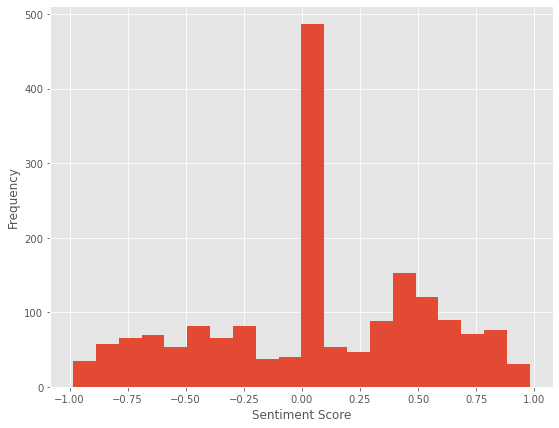

In [13]:
plt.style.use("ggplot")
df.sentiment.hist(bins = 20, figsize= (9, 7))
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency");

#### Challenge 4. Answer questions about the data

- What are the 3 most positive and negative texts?
- Using the vader threshold for positive, neutral, and negative, how many article qualify for each of those labels?


In [14]:
#Most positive texts
df.sort_values("sentiment", ascending = False)["lead_paragraph"].iloc[:3].tolist()

['In the autumn of 2008, just a few weeks after my 33rd birthday, I cast a ballot for the first time. Up to that point, serving in the military seemed like more than sufficient civic engagement and provided a ready excuse for voluntarily opting out of several elections. By the time Barack Obama won the Democratic primary, I was an officer who’d spent more than a decade in the Navy and not a second in a voting booth. This apathy does not run in the blood. My parents are products of the civil rights era and the Jim Crow South, and as such religiously exercised their hard-won right to vote. In my formative years, the basic disposition of the house politics pressed together progressive demands for racial equality with the Black conservatism of marathon church services that stretched deep into Southern Sunday afternoons. We differed in degree on any number of issues, but elections were where our politics really diverged. Like much of Black America, my mother is a lifelong Democrat, staying 

In [15]:
#Most negative texts
df.sort_values("sentiment", ascending = True)["lead_paragraph"].iloc[:3].tolist()

['On an October morning four years ago, eight young staff members at the Indiana Voter Registration Project in Indianapolis were planning their final steps before a closely contested presidential election. In recent weeks they had registered 45,000 new voters, most of whom were Black and Latino, and they were on track to enlist 10,000 more before Election Day. Their work had gone smoothly for the most part, but several canvassers had submitted applications with names that appeared to have been made up or drawn from the phone book, most likely to create the appearance that they were doing more work than they had actually done. That was illegal — submitting a false registration is a felony under Indiana law — and also frustrating. A made-up name was not going to help anyone vote. The staff members stopped using the suspect canvassers, but they couldn’t simply trash the faulty registrations: State law required them to file every application they collected, even if they had false names or 

In [17]:
df.sentiment.abs().nsmallest()

6     0.0
8     0.0
12    0.0
15    0.0
17    0.0
Name: sentiment, dtype: float64

In [19]:
#Proportion of pos, neg, and neu texts
def bin_func(x):
    if x > 0.05:
        return "positive"
    elif x < -.05:
        return "negative"
    else:
        return "neutral"
df.sentiment.apply(bin_func).value_counts()

positive    765
negative    584
neutral     454
Name: sentiment, dtype: int64

**How did sentiment fluctuate over the course of the campaign?**

In [21]:
#Create a panda series using the publication dates as the index and sentiment scores as the values
sentiment_ts = pd.Series(index= df.pub_date.tolist(), data = df.sentiment.tolist())

In [22]:
#Resample aka groupby the data using d for daily and w for weekly
daily = sentiment_ts.resample("d").mean()
weekly = sentiment_ts.resample("w").mean()

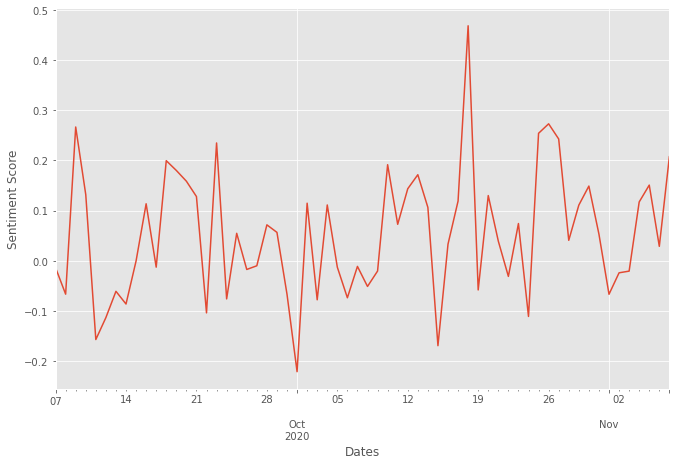

In [24]:
#Daily average sentiment of articles.
daily.plot(figsize = (11, 7))
plt.xlabel("Dates")
plt.ylabel("Sentiment Score");

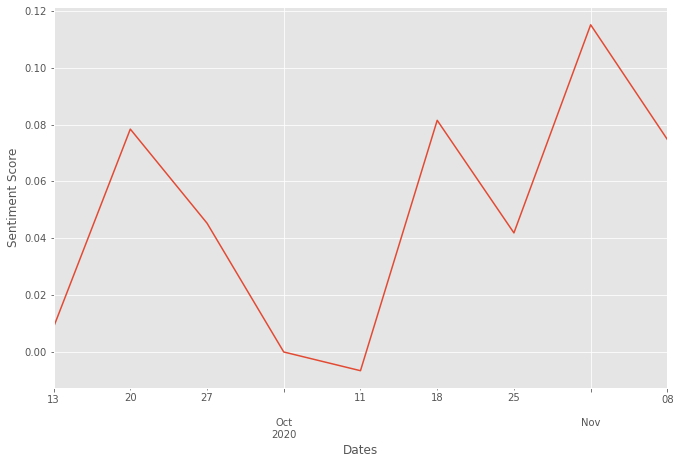

In [25]:
#Weekly average sentiment of articles.
weekly.plot(figsize = (11, 7))
plt.xlabel("Dates")
plt.ylabel("Sentiment Score");

### Bonus Section: Handling nested arrays of keywords


The Times has done us a favor in providing the named entities in the articles, thus relieveing us of having to do that task. However the data structure that it comes in can be tricky to handle. 

We've provided a short tutorial showing one way to cleanly extract keyword data.

In [26]:
#Refer to a sample article's set of keywords
df.keywords.iloc[1]

[{'name': 'subject',
  'value': 'Demonstrations, Protests and Riots',
  'rank': 1,
  'major': 'N'},
 {'name': 'subject', 'value': 'Music', 'rank': 2, 'major': 'N'},
 {'name': 'subject', 'value': 'Pop and Rock Music', 'rank': 3, 'major': 'N'},
 {'name': 'persons',
  'value': 'Lukashenko, Aleksandr G',
  'rank': 4,
  'major': 'N'},
 {'name': 'glocations', 'value': 'Belarus', 'rank': 5, 'major': 'N'},
 {'name': 'glocations', 'value': 'Minsk (Belarus)', 'rank': 6, 'major': 'N'},
 {'name': 'subject',
  'value': 'Politics and Government',
  'rank': 7,
  'major': 'N'},
 {'name': 'subject', 'value': 'Elections', 'rank': 8, 'major': 'N'}]

We see a number of things here:
- Each article's keywords are laid out in a list of dictionaries.
- A dictionary tell us the name, type, ranking, and major of the keyword.
- The five types of keywords are: subject, persons, glocations, organizations, and creative_works
- The ordering of the list corresponds to the ranking.
- All articles do not all have the same number of rankings, ranges from 1 - 19.

We've created a function to extract keyword data based on the ranking. This function will be applied over the pandas series of keyword data.

In [27]:

def rank_extractor(data, rank):
    #Empty list return non
    if data == []:
        return None
    #Iterate over the list of keywords until you reach the keyword corresponding with the ranking.
    for i in data:
        if i["rank"] == rank:
    #return just keyword and its type in a dictionary form
            return {"name":i["name"], "value":i["value"]}

In [28]:
#Extract the first, second, and third keywords
rank1 = df.keywords.apply(lambda x: rank_extractor(x,1))
rank2 = df.keywords.apply(lambda x: rank_extractor(x,2))
rank3 = df.keywords.apply(lambda x: rank_extractor(x,3))

In [29]:
#View results
rank1.head()

0    {'name': 'subject', 'value': 'News and News Me...
1    {'name': 'subject', 'value': 'Demonstrations, ...
2     {'name': 'persons', 'value': 'Harris, Kamala D'}
3    {'name': 'subject', 'value': 'Voting and Voters'}
4    {'name': 'subject', 'value': 'Great Britain Wi...
Name: keywords, dtype: object

Convert the series containing dictionaries to a dataframe

In [30]:
rank1 = rank1.apply(pd.Series)
rank2 = rank2.apply(pd.Series)
rank3 = rank3.apply(pd.Series)
rank1.head()

,name,value
0,subject,News and News Media
1,subject,"Demonstrations, Protests and Riots"
2,persons,"Harris, Kamala D"
3,subject,Voting and Voters
4,subject,Great Britain Withdrawal from EU (Brexit)


Voila, nice clean format. Now can we conduct some light analysis.

In [31]:
#Most frequent type of keyword in ranking #1
rank1.name.value_counts()


subject           1037
persons            279
glocations          87
organizations       71
creative_works      10
Name: name, dtype: int64

In [34]:
#Most common glocation in rank1
rank1.query("name == 'glocations'").value.value_counts().head()

New York State    4
Georgia           4
Russia            4
Wisconsin         4
France            3
Name: value, dtype: int64